### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.compose import make_column_transformer
from sklearn import set_config

set_config(display="diagram")

In [45]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 




{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [33]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [37]:
unique_labels = np.unique(y)
unique_labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [35]:
#  Dataset: https://archive.ics.uci.edu/dataset/53/iris

# Business Problem: A floriculture company sells Iris flowers. The business wants to build an automated sorting process to identify each type of iris and classify it accordingly.

# Metric: The appropriate metric here would be Accuracy as I want to focus on overall correctness.  

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 34)

/Users/ngratzi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


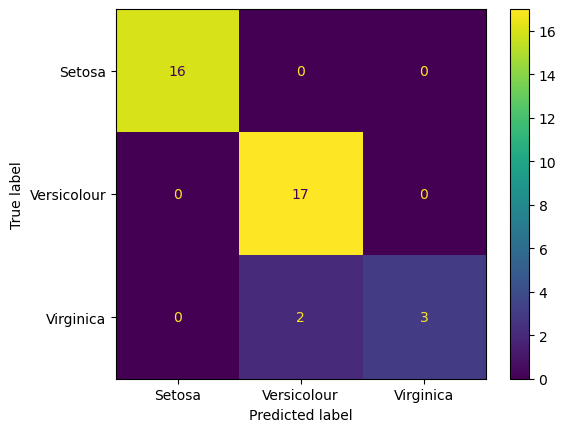

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.89      1.00      0.94        17
 Iris-virginica       1.00      0.60      0.75         5

       accuracy                           0.95        38
      macro avg       0.96      0.87      0.90        38
   weighted avg       0.95      0.95      0.94        38



In [50]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
    ])
knn_pipe.fit(X_train, y_train)
preds = knn_pipe.predict(X_test)
test_predictions = knn_pipe.predict_proba(X_test)

cancer_confusion_mat = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cancer_confusion_mat, display_labels=['Setosa', 'Versicolour', 'Virginica'])
disp.plot()
plt.show()

print(classification_report(y_test, preds))

/Users/ngratzi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/ngratzi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expe

9


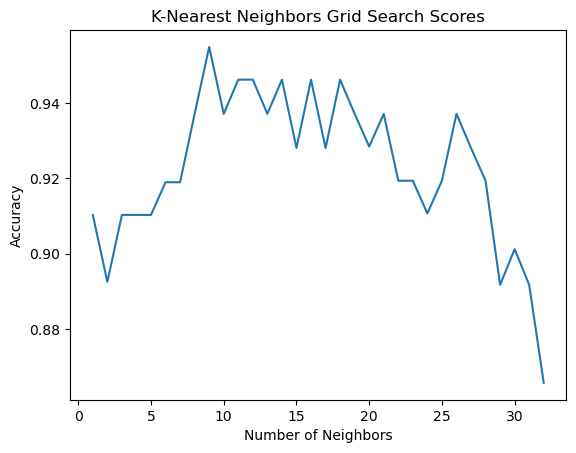

In [59]:
grid = GridSearchCV(knn_pipe, param_grid={'knn__n_neighbors': range(1, 33, 1)})
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_k = grid.best_params_['knn__n_neighbors']
print(best_k)


# Convert the grid search results into a DataFrame
results = pd.DataFrame(grid.cv_results_)
results
# Plotting
plt.plot(results['param_knn__n_neighbors'], results['mean_test_score'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Grid Search Scores')
plt.show()

/Users/ngratzi/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


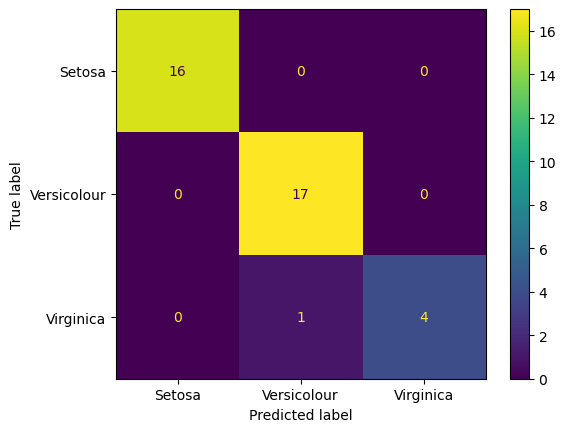

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.80      0.89         5

       accuracy                           0.97        38
      macro avg       0.98      0.93      0.95        38
   weighted avg       0.98      0.97      0.97        38



In [58]:
knn_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier(n_neighbors=3))
    ])
knn_pipe.fit(X_train, y_train)
preds = knn_pipe.predict(X_test)
test_predictions = knn_pipe.predict_proba(X_test)

cancer_confusion_mat = confusion_matrix(y_test, knn_pipe.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cancer_confusion_mat,display_labels=['Setosa', 'Versicolour', 'Virginica'])
disp.plot()
plt.show()

print(classification_report(y_test, preds))